<a href="https://colab.research.google.com/github/alinyaraujos/machine-learning/blob/activity-2/ApredizagemDeMaquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



O conjunto de dados analisados é sobre doença cardíaca UCI

https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv



In [301]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart.csv')

In [304]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [305]:
#verificando se realmente o alvo está divido em duas classes
dados['target'].nunique()

2

In [306]:
#verificando se exitem dados faltantes
dados.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [307]:
plt.rcParams["figure.figsize"] = (8,6)

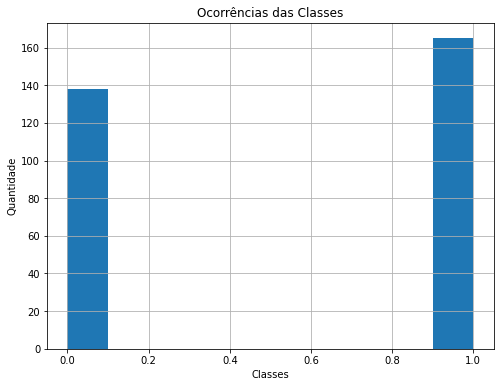

In [308]:
#verificando ocorrência das classes
plt.hist(dados['target'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

In [309]:
#contando quantidade de occorrencias de cada classe
print('Ausência da doença:',dados[dados['target']==0].shape[0])
print('Presença da doença:',dados[dados['target']==1].shape[0])

Ausência da doença: 138
Presença da doença: 165


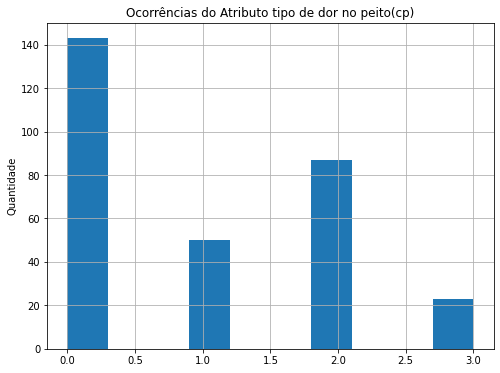

In [310]:
#verificando ocorrências do atributo de tipo de dor no peito (cp)
plt.hist(dados['cp'],10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo tipo de dor no peito(cp)')
plt.grid(True)
plt.show()

In [311]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [312]:
corr = dados.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


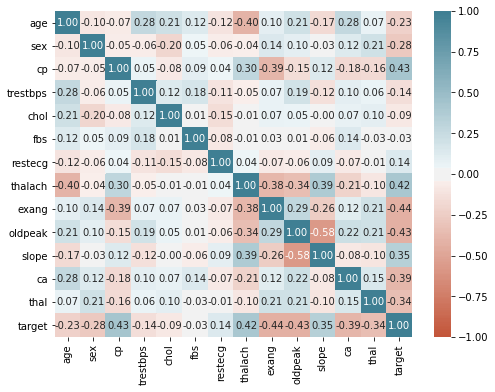

In [313]:
#Não tem muita correlação 
plt.figure(figsize=(8,6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', cmap=sns.diverging_palette(20, 220, n=200))

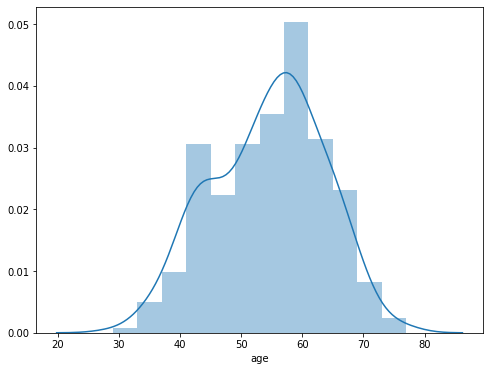

In [314]:
sns.distplot(dados['age'])
#A maioria das pessoas então com idades entre 40 a 60 anos 

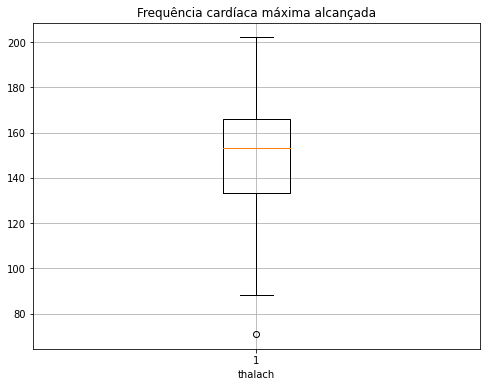

In [315]:
plt.boxplot(dados.thalach)
plt.title('Frequência cardíaca máxima alcançada')
plt.xlabel('thalach')
plt.grid()
plt.show()

In [316]:
target = dados[dados['target']==0].drop(columns=['target']).reset_index(drop=True)

In [317]:
notTarget = dados[dados['target']==1].drop(columns=['target']).reset_index(drop=True)

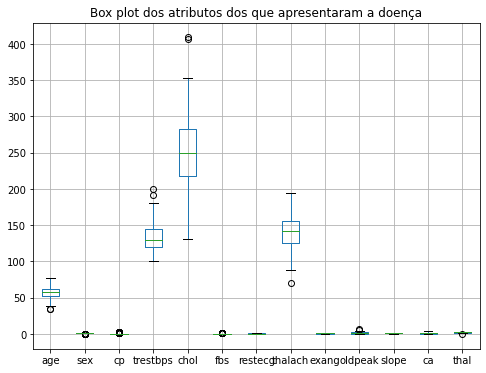

In [318]:
target.boxplot()
plt.title('Box plot dos atributos dos que apresentaram a doença')
plt.show()

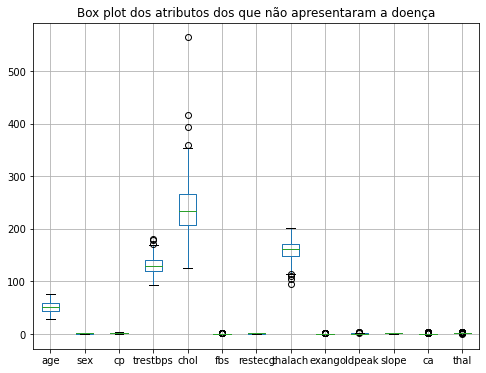

In [319]:
notTarget.boxplot()
plt.title('Box plot dos atributos dos que não apresentaram a doença')
plt.show()

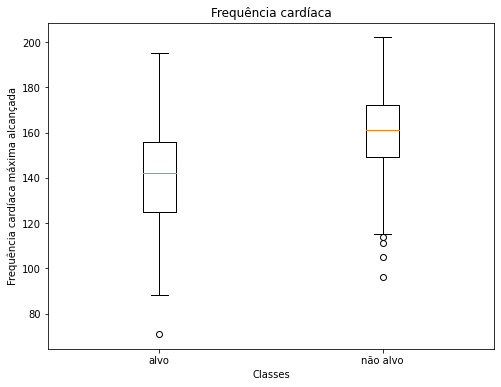

In [320]:

# box plot comparando o perimetro medio para as duas classes
plt.boxplot([target.thalach,notTarget.thalach],labels=['alvo','não alvo'])
plt.xlabel('Classes')
plt.ylabel('Frequência cardíaca máxima alcançada')
plt.title('Frequência cardíaca')
plt.show()

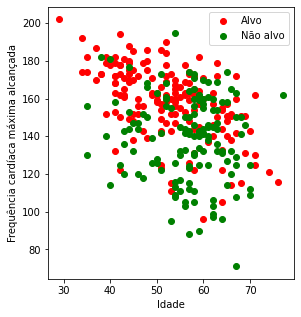

In [321]:
#quanto maior a frequencia cardíaca em pessoas mais jovens, mais chances elas tem de serem o alvo
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(x=dados.age[dados.target==1],y=dados.thalach[dados.target==1],c='red')
plt.scatter(x=dados.age[dados.target==0],y=dados.thalach[dados.target==0],c='green')
plt.xlabel('Idade')
plt.ylabel('Frequência cardíaca máxima alcançada')
plt.legend(['Alvo','Não alvo'])


In [322]:
#Re-escala usando máximo e mínimo
dados = (dados - dados.min())/(dados.max()-dados.min())


In [323]:
dados

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [324]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,:-1]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [325]:
y = dados.target
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
#Dividindo a matriz em um conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [328]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
236,0.604167,1.0,0.000000,0.292453,0.397260,0.0,0.0,0.763359,0.0,0.000000,1.0,0.50,1.000000
40,0.458333,0.0,0.666667,0.433962,0.415525,0.0,0.0,0.541985,0.0,0.241935,1.0,0.25,0.666667
69,0.687500,0.0,0.000000,0.283019,0.189498,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667
47,0.375000,1.0,0.666667,0.415094,0.299087,0.0,0.0,0.648855,0.0,0.000000,1.0,0.00,0.666667
106,0.833333,1.0,1.000000,0.622642,0.246575,1.0,0.0,0.458015,0.0,0.016129,0.5,0.25,0.666667


In [329]:
y_train.head()

236    0.0
40     1.0
69     1.0
47     1.0
106    1.0
Name: target, dtype: float64

In [330]:
from sklearn.tree import DecisionTreeClassifier

In [331]:
#realizando classificação - árvore de decisão
classificador = DecisionTreeClassifier()

In [332]:
classificador.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [333]:
from sklearn.tree import plot_tree

In [334]:
plt.rcParams["figure.figsize"] = (30,20)


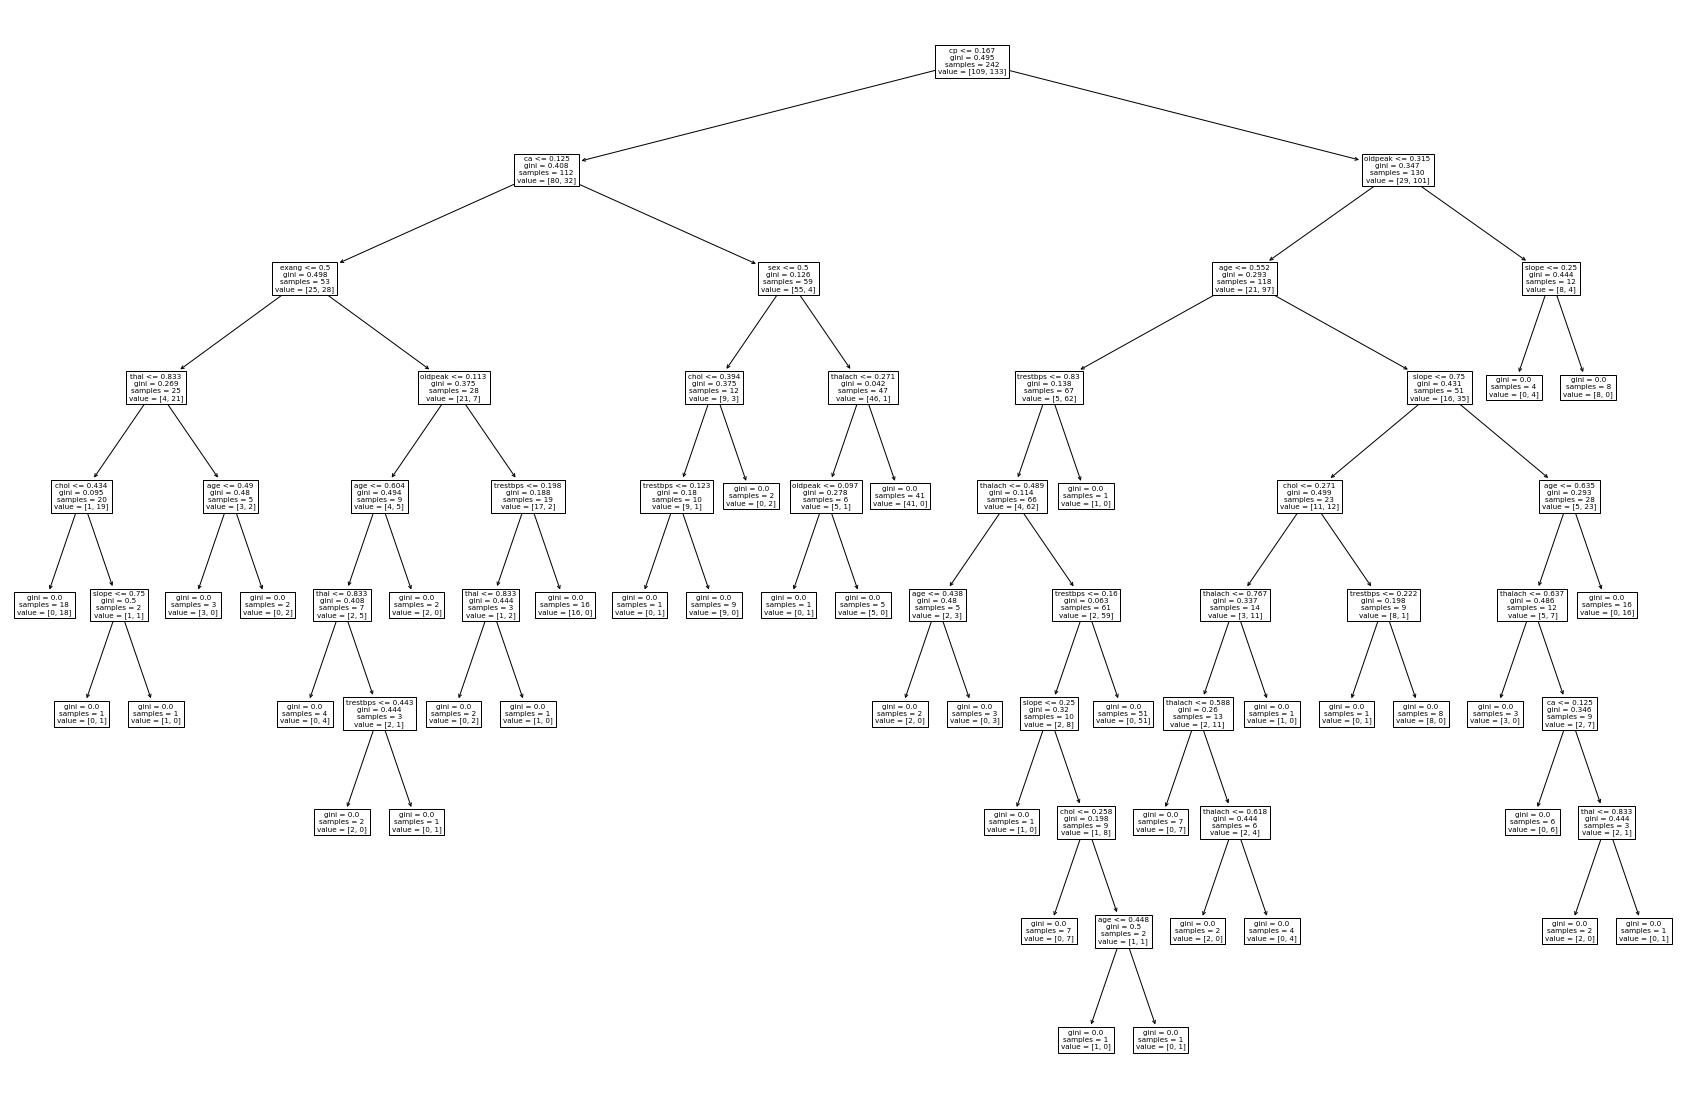

In [335]:
#ilustração da árvore de decisão
plot_tree(classificador,feature_names=dados.columns[:-1])
plt.show()

In [336]:
plt.rcParams["figure.figsize"] = (8,6)

In [337]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0.])

In [338]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',classificacao[i])

0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 1.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 0.0
1.0 	 1.0
1.0 	 1.0
1.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
1.0 	 1.0
1.0 	 0.0
0.0 	 1.0
1.0 	 1.0
1.0 	 1.0
1.0 	 0.0
1.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0


In [339]:
#avaliação do classificador
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

**Analisando os cálculos para avaliação do classificador, aparente tem um valor considerável nos resultados. Mas,levando em consideração o problema analisado seria necessário testar outros tipos de métodos para tentar conseguir um valor mais próximo de 1**



In [340]:
#calculando acurácia
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.7704918032786885

In [341]:
#calculando precisão
precisao = precision_score(y_test,classificacao)
precisao

0.8214285714285714

In [342]:
#calculando recall (revocação)
recall = recall_score(y_test,classificacao)
recall

0.71875

In [343]:
#calculando f1-score
f1 = f1_score(y_test,classificacao)
f1

0.7666666666666666

In [344]:
#plotando curva roc
from sklearn.metrics  import roc_curve

**Representação gráfica para o desepenho dos classificadores, quando mais próximo do 1 do eixo y melhor "**

In [345]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [346]:
fpr

array([0.        , 0.17241379, 1.        ])

In [347]:
tpr

array([0.     , 0.71875, 1.     ])

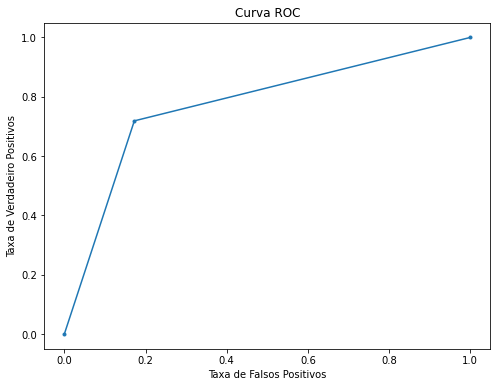

In [348]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [349]:
from sklearn.metrics import roc_auc_score

**interpretação númerica da curva de roc**

In [350]:
erro = roc_auc_score(y_test,classificacao)
erro

0.7731681034482758

In [351]:
from sklearn.model_selection import KFold

**validação cruzada**

In [352]:
kf = KFold(n_splits=5)

In [353]:
#imprimindo os indices das instancias do treino e teste
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302] 
Teste: [

In [354]:
#avaliado o modelo
from sklearn.model_selection import cross_val_score
classificador = DecisionTreeClassifier()


In [355]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.77419355, 0.83870968, 0.87096774, 0.83333333, 0.8       ,
       0.66666667, 0.73333333, 0.7       , 0.7       , 0.76666667])

**Dar para perceber que consegue obter alguns resultados um pouco melhor que o encontrado usando a penas a divisão simples de treino e teste**

In [356]:
scores.mean(),scores.std()

(0.7683870967741935, 0.06453798912809687)

In [357]:
#definindo árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [358]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [359]:
#calculando acurácia da árvore de decisão
arvore.score(X_test,y_test)


0.7868852459016393

In [360]:
#calculando acurácia da random forest
floresta.score(X_train,y_train)

1.0

In [361]:
#realizando previsão com árvore de decisão
clf_arvore = arvore.predict(X_test)

In [362]:
#realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

In [363]:
#calculando curva roc da árvore de decisão
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore)


In [364]:
#calculando curva roc da random forest
fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floresta)

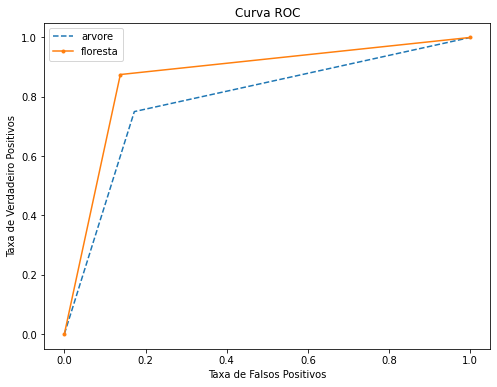

In [365]:

#plotando curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [366]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(arvore,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.758, 0.064)

In [367]:
#criando floresta
floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.825, 0.057)

**É possível perceber que usando floresta o resultado consegue chega mais próximo do satisfatório que usando árvore**